In [16]:
from gwpy.time import to_gps
import glob
import pandas as pd
import os
import numpy as np
from utils import create_dataframe, coherence_above, combine_data_files, get_max_coherence, give_group_v2
import plotly.express as px
import plotly


In [2]:
def create_dataframe(files, threshold=0.6, frequency_threshold=200):
    
    coh_threshold = threshold
    freq_threshold = frequency_threshold
    
    df_list = []
    for file in files:
            df = pd.read_csv(file, header=None, names=['frequency', 'coherence'])
            df = df[(df['coherence']>coh_threshold) & 
                    (df['frequency']<freq_threshold) ]# & ((df['frequency']>61) | (df['frequency']<59))]
            if len(df)!=0:
                chan_name = file.split('/')[-1].split('.csv')[0]
                df['channel'] = [chan_name]*len(df)
                df_list.append(df)
            
    if df_list:
        frame = pd.concat(df_list, axis=0, ignore_index=True)
    else:
        frame = pd.DataFrame()
    
    return frame

def freq_masks(df):
    freq_mask = ((df.frequency >= 59.8) & (df.frequency <= 60.2)) | ((df.frequency >= 119.8) & (df.frequency <= 120.2)) \
    | ((df.frequency >= 179.8) & (df.frequency <= 180.2))

    return df[~freq_mask]

def coherence_above(ifo, date, threshold=0.6, fhigh=200, path=None):
    
    gpstime = to_gps(date)
    if path is None:
        path = f'/home/siddharth.soni/public_html/coherence_monitor/{ifo}/{date}/{gpstime}/data/'
    else:
        path = path
    times = [os.path.join(path, i, '') for i in os.listdir(path)]
    
    if not times:
        print("No data found for this date")
        
    dflist = {}
    for time in times:
        gpstime_ = time.split('/')[-2]
        #print(gpstime_)
        print(f"Running for {time}")
        files = glob.glob(time + '*.csv')
        df = create_dataframe(files, threshold=threshold, frequency_threshold=fhigh)
        df = freq_masks(df)
        df['time'] = gpstime_
        df.reset_index(drop=True, inplace=True)
        
        #print(len(df))
        
        if len(df)!=0:
            maxpath = path.replace('data/','')
            path_ = os.path.join(maxpath, 'max_coherence','')
            os.makedirs(path_, exist_ok=True)
                #print(path_)
            df.to_csv(path_ + f'coherence_above_{gpstime_}.csv', index=None)
            dflist[gpstime_] = df
        
    return dflist

In [17]:
cohL1_nov11 = coherence_above(ifo='L1', date='2024-11-11', threshold=0.7)

1415351118
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415351118/
100
1415369118
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415369118/
74
1415330827
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415330827/
85
1415327227
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415327227/
89
1415365518
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415365518/
98
1415361918
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415361918/
105
1415400634
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415400634/
91
1415358318
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415358318/
105
1415380301
Running for /home/siddharth.soni/p

In [18]:
cohL1_nov11['1415351118']

,frequency,coherence,channel,time
0,6.8,0.703852,L1:ASC-Y_TR_B_YAW_OUT_DQ,1415351118
1,3.3,0.748874,L1:SUS-SR2_M2_WIT_P_DQ,1415351118
2,6.8,0.733718,L1:ASC-REFL_B_RF9_I_YAW_OUT_DQ,1415351118
3,6.8,0.729661,L1:ASC-REFL_B_RF45_Q_YAW_OUT_DQ,1415351118
4,3.3,0.703476,L1:SUS-SR2_M3_WIT_P_DQ,1415351118
...,...,...,...,...
95,6.8,0.736117,L1:ASC-REFL_A_DC_YAW_OUT_DQ,1415351118
96,3.3,0.819825,L1:SUS-ITMY_L2_WIT_L_DQ,1415351118
97,6.8,0.715575,L1:ASC-CHARD_Y_B_OUT_DQ,1415351118
98,6.8,0.732521,L1:ASC-REFL_B_RF45_I_YAW_OUT_DQ,1415351118


In [11]:
cohL1_nov18 = coherence_above(ifo='L1', date='2024-11-18', threshold=0.6)

1415997186
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415997186/
191
1415930718
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415930718/
179
1415923518
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415923518/
212
1415963118
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415963118/
179
1415970318
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415970318/
201
1415973918
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415973918/
190
1415941518
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415941518/
191
1416004386
Running for /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1416004386/
202
1415934318
Running for /home/siddharth.s

In [1]:
from utils import coherence_above

/home/siddharth.soni/.local/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
/home/siddharth.soni/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [19]:
#coherence_above(ifo='H1', date='2024-10-18')

In [20]:
#coherence_above(ifo='H1', date='2024-10-30')

In [21]:
#coherence_above(ifo='H1', date='2024-10-31')

In [22]:
#coherence_above(ifo='L1', date='2024-10-30')

In [23]:
#coherence_above(ifo='L1', date='2024-10-31')

In [7]:
import matplotlib.pyplot as plt

In [33]:
from utils import combine_data_files, get_max_coherence

pathNov11_a = '/home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-11/1415318418/data/1415319831/'
frame_1415319831 = combine_data_files(path=pathNov11_a)

In [34]:
maxcoh_Nov11 = get_max_coherence(dataframe=frame_1415319831, min_freq=0.0, max_freq=100.0)

In [35]:
maxcoh_Nov11

,freq,value,channel
0,2.8,0.13,L1:SUS-ETMY_L1_WIT_P_DQ
1,2.9,0.46,L1:SUS-ETMY_L1_WIT_P_DQ
2,3.0,0.44,L1:SUS-ETMX_L2_WIT_L_DQ
3,3.1,0.57,L1:SUS-ETMX_M0_DAMP_L_IN1_DQ
4,3.2,0.68,L1:LSC-MICH_OUT_DQ
...,...,...,...
179,60.5,0.33,L1:ASC-DHARD_P_OUT_DQ
180,60.6,0.14,L1:ASC-DHARD_P_OUT_DQ
181,75.9,0.12,L1:SUS-FC2_M1_DAMP_T_IN1_DQ
182,76.0,0.62,L1:SUS-FC2_M1_DAMP_T_IN1_DQ


In [32]:
files_1415319831[files_1415319831.freq==2.8].sort_values(by='value', ascending=False)

,freq,value,channel
4310,2.8,0.13,L1:SUS-ETMY_L1_WIT_P_DQ
124593,2.8,0.13,L1:SUS-ETMX_L2_WIT_L_DQ
268371,2.8,0.13,L1:SUS-ETMX_M0_DAMP_L_IN1_DQ
136630,2.8,0.11,L1:SUS-ETMY_L1_WIT_L_DQ
137811,2.8,0.11,L1:SUS-ETMY_M0_DAMP_L_IN1_DQ
137690,2.8,0.10,L1:SQZ-OMC_TRANS_RF3_Q_NORM_DQ
268457,2.8,0.10,L1:SUS-SR3_M1_DAMP_L_IN1_DQ


In [ ]:
GWDATAFIND_SERVER = 'datafind.ldas.cit:80'

In [3]:
os.environ['GWDATAFIND_SERVER'] = 'datafind.ldas.cit:80'

In [4]:
from utils import check_channel_coherence
coh = check_channel_coherence(channel='L1:SUS-ETMY_L1_WIT_P_DQ', ifo='L1', t1=1415319831, t2=1415319831+200)

In [10]:
coh

<FrequencySeries([0.0001603 , 0.00232528, 0.01516083, ...,
                  0.02412711, 0.0036403 , 0.00227937]
                 unit=Unit("coherence"),
                 f0=<Quantity 0. Hz>,
                 df=<Quantity 0.1 Hz>,
                 epoch=<Time object: scale='utc' format='gps' value=1415319831.0>,
                 name='Coherence between L1:GDS-CALIB_STRAIN and L1:SUS-ETMY_L1_WIT_P_DQ',
                 channel=<Channel("L1:GDS-CALIB_STRAIN" [reduced], 16384.0 Hz) at 0x7f0ba57717f0>)>

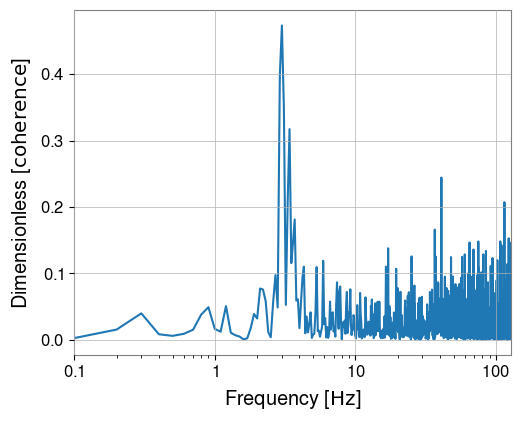

In [8]:
coh.plot()
plt.show()

In [15]:
### Generating Plots for Oct 30
from gwpy.time import to_gps
from utils import plot_max_corr_chan
import os
import logging
date='2024-10-30'
gps_date = to_gps(date).gpsSeconds
ifo = 'H1'
savedir = f'/home/siddharth.soni/public_html/coherence_monitor/{ifo}/'
savedir_path = os.path.join(savedir, date, str(gps_date), 'data', '')
path_outdir = os.path.join(savedir, date, str(gps_date), 'plots','')
logging.info(savedir_path)

for filepath in os.listdir(savedir_path):
    path_ = os.path.join(savedir_path, filepath, '')
    logging.info(path_)
    t = path_.split('/')[-2]
    savedir_plots = os.path.join(path_outdir, t, '')
    print(savedir_plots)
    os.makedirs(savedir_plots, exist_ok=True)
    plot_max_corr_chan(path=path_, ifo=ifo, fft=10, savedir=savedir_plots)

/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414348362/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414348362//channels_coh_1414348362_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414348362//channels_coh_1414348362_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414303125/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414303125//channels_coh_1414303125_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414303125//channels_coh_1414303125_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414288441/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414288441//channels_coh_1414288441_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414288441//channels_coh_1414288441_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414292041/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414292041//channels_coh_1414292041_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414292041//channels_coh_1414292041_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414299525/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414299525//channels_coh_1414299525_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414299525//channels_coh_1414299525_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414310418/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414310418//channels_coh_1414310418_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-30/1414281618/plots/1414310418//channels_coh_1414310418_b.png` didn't end with .html. Adding .html to the end of your file.



In [16]:
from gwpy.time import to_gps
from utils import plot_max_corr_chan
import os
import logging
def gen_plots(date, ifo):
    date=date
    gps_date = to_gps(date).gpsSeconds
    ifo = ifo
    savedir = f'/home/siddharth.soni/public_html/coherence_monitor/{ifo}/'
    savedir_path = os.path.join(savedir, date, str(gps_date), 'data', '')
    path_outdir = os.path.join(savedir, date, str(gps_date), 'plots','')
    logging.info(savedir_path)

    for filepath in os.listdir(savedir_path):
        path_ = os.path.join(savedir_path, filepath, '')
        logging.info(path_)
        t = path_.split('/')[-2]
        savedir_plots = os.path.join(path_outdir, t, '')
        print(savedir_plots)
        os.makedirs(savedir_plots, exist_ok=True)
        plot_max_corr_chan(path=path_, ifo=ifo, fft=10, savedir=savedir_plots)
        
    return

In [17]:
gen_plots(date='2024-10-31', ifo='H1')

/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414404018/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414404018//channels_coh_1414404018_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414404018//channels_coh_1414404018_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414375997/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414375997//channels_coh_1414375997_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414375997//channels_coh_1414375997_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414387879/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414387879//channels_coh_1414387879_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414387879//channels_coh_1414387879_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414400418/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414400418//channels_coh_1414400418_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414400418//channels_coh_1414400418_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414407618/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414407618//channels_coh_1414407618_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414407618//channels_coh_1414407618_b.png` didn't end with .html. Adding .html to the end of your file.



/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414396818/
Got the data, now making plots


/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414396818//channels_coh_1414396818_a.png` didn't end with .html. Adding .html to the end of your file.

/cvmfs/software.igwn.org/conda/envs/igwn-py39/lib/python3.9/site-packages/plotly/offline/offline.py:557: UserWarning:

Your filename `/home/siddharth.soni/public_html/coherence_monitor/H1/2024-10-31/1414368018/plots/1414396818//channels_coh_1414396818_b.png` didn't end with .html. Adding .html to the end of your file.



In [18]:
from gwpy.time import from_gps
from_gps(1414300745.0)

datetime.datetime(2024, 10, 30, 5, 18, 47)

In [12]:
fr = combine_data_files('data/1416200418/')

In [13]:
fr

,freq,value,channel
0,59.9,0.84,L1:ISI-HAM6_BLND_GS13RZ_IN1_DQ
1,60.0,0.85,L1:ISI-HAM6_BLND_GS13RZ_IN1_DQ
2,60.1,0.82,L1:ISI-HAM6_BLND_GS13RZ_IN1_DQ
3,119.9,0.38,L1:ISI-HAM6_BLND_GS13RZ_IN1_DQ
4,120.0,0.49,L1:ISI-HAM6_BLND_GS13RZ_IN1_DQ
...,...,...,...
410499,300.0,0.28,L1:LSC-MOD_RF45_AM_ERR_OUT_DQ
410500,419.8,0.12,L1:LSC-MOD_RF45_AM_ERR_OUT_DQ
410501,419.9,0.14,L1:LSC-MOD_RF45_AM_ERR_OUT_DQ
410502,659.8,0.15,L1:LSC-MOD_RF45_AM_ERR_OUT_DQ


In [20]:
frmax = get_max_coherence(fr, min_freq=0.0, max_freq=200.0, fft=10)
vals = frmax
vals['group'] = vals['channel'].apply(give_group_v2)
vals.rename(columns={'value':'Coherence', 'freq':'Frequency'},  inplace=True)

#plotdir = os.path.join(pathifo, date, str(gpstime), 'plots', folder,'')
#os.makedirs(plotdir, exist_ok=True)
#print(plotdir)
fig1 = px.scatter(vals, x="Frequency", y="Coherence", hover_data=['channel'], color="group",
                  labels={"max_correlation": "Max Coherence", "frequency": "Frequency [Hz]"})

fig1.update_layout(title=dict(text=f"{ifo}: Highest Coherence channel at each frequency during {1416200418} -- {str(int(1416200418) + 3600)}",
               font=dict(family="Courier New, monospace", size=22, color="RebeccaPurple")))
plotly.offline.plot(fig1, filename=f'channels_coh_{int(1416200418)}.png')

NameError: name 'ifo' is not defined

In [27]:
import os

def get_folder_size(folder_path):
    total_size = 0
    # Walk through all directories and files in the given folder
    for dirpath, dirnames, filenames in os.walk(folder_path):
        for file in filenames:
            file_path = os.path.join(dirpath, file)
            # Add file size if the file exists
            if os.path.isfile(file_path):
                total_size += os.path.getsize(file_path)
                
    total_size_mb = round(total_size / (1024 * 1024))
    return total_size_mb

# Example usage
# folder_path = "path/to/your/folder"  # Replace with your folder path
# size_in_bytes = get_folder_size(folder_path)
# print(f"Folder size: {size_in_bytes / (1024 * 1024):.2f} MB")


In [28]:
get_folder_size('/home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-24/')

216

In [34]:
dirsNovL1 = sorted(os.listdir('/home/siddharth.soni/public_html/coherence_monitor/L1/'))[26:]

In [36]:
dirsNovL1[0]

'2024-11-01'

In [38]:
a=0
for i in dirsNovL1:
    a += get_folder_size(f'/home/siddharth.soni/public_html/coherence_monitor/L1/{i}/')

In [39]:
a/len(dirsNovL1)

168.72

In [1]:
from utils import combine_data_files, get_max_coherence

/home/siddharth.soni/.local/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS
/home/siddharth.soni/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
frNov18 = combine_data_files('/home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-18/1415923218/data/1415993586/')

In [3]:
frNov18

,freq,value,channel
0,59.9,0.93,L1:PEM-EY_ACC_BSC5_ETMY_Z_DQ
1,60.0,0.95,L1:PEM-EY_ACC_BSC5_ETMY_Z_DQ
2,60.1,0.93,L1:PEM-EY_ACC_BSC5_ETMY_Z_DQ
3,120.0,0.15,L1:PEM-EY_ACC_BSC5_ETMY_Z_DQ
4,179.8,0.19,L1:PEM-EY_ACC_BSC5_ETMY_Z_DQ
...,...,...,...
256513,300.1,0.20,L1:PEM-EY_MAINSMON_EBAY_1_DQ
256514,360.0,0.20,L1:PEM-EY_MAINSMON_EBAY_1_DQ
256515,360.1,0.16,L1:PEM-EY_MAINSMON_EBAY_1_DQ
256516,60.0,0.13,L1:SUS-PR3_M2_WIT_L_DQ


In [4]:
frmaxNov18 = get_max_coherence(frNov18, min_freq=0.0, max_freq=200.0, fft=10)

In [5]:
frmaxNov18

,freq,value,channel
0,2.8,0.19,L1:SUS-ETMX_M0_DAMP_L_IN1_DQ
1,2.9,0.4,L1:LSC-MICH_OUT_DQ
2,3.0,0.48,L1:SUS-ETMX_L2_WIT_L_DQ
3,3.1,0.57,L1:SUS-ETMX_L2_WIT_L_DQ
4,3.2,0.69,L1:LSC-SRCL_OUT_DQ
...,...,...,...
124,179.8,0.41,L1:ISI-ITMX_ST2_BLND_RZ_GS13_CUR_IN1_DQ
125,179.9,0.94,L1:PEM-EY_MAINSMON_EBAY_1_DQ
126,180.0,0.97,L1:PEM-EY_ACC_BSC5_ETMY_Z_DQ
127,180.1,0.94,L1:ISI-HAM7_BLND_GS13Z_IN1_DQ


In [7]:
frmaxNov18[frmaxNov18.freq==83.3]

,freq,value,channel
121,83.3,0.87,L1:PEM-MX_ACC_BEAMTUBE_VEA_X_DQ


In [2]:
import os, shutil 

In [14]:
cur_dir = '/home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-01/1414454418/'
par_dir = os.path.abspath(os.path.join(cur_dir, os.pardir))

In [15]:
par_dir

'/home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-01'

In [17]:
for item in os.listdir(cur_dir):
    source = os.path.join(cur_dir, item)
    destination = os.path.join(par_dir, item)
    
    # Move only if source exists
    if os.path.exists(source):
        shutil.move(source, destination)
#Delete the current directory
try:
    os.rmdir(cur_dir)  # Use this if the directory is expected to be empty
    print(f"Deleted directory: {cur_dir}")
except OSError:
    # If the directory isn't empty, use shutil.rmtree
    shutil.rmtree(cur_dir)
    print(f"Deleted non-empty directory: {cur_dir}")

Deleted directory: /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-01/1414454418/


In [47]:
def move_files_del_old_dir(date, ifo):
    
    gpstime = str(to_gps(date).gpsSeconds)
    cur_dir = os.path.join(f'/home/siddharth.soni/public_html/coherence_monitor/{ifo}/', date, gpstime, '')
    par_dir = os.path.abspath(os.path.join(cur_dir, os.pardir))
    
#     for item in os.listdir(cur_dir):
#         source = os.path.join(cur_dir, item)
#         destination = os.path.join(par_dir, item)

#         # Move only if source exists
#         if os.path.exists(source):
#             shutil.move(source, destination)
            
        
    #Delete the current directory
    try:
        os.rmdir(cur_dir)  # Use this if the directory is expected to be empty
        print(f"Deleted directory: {cur_dir}")
    except OSError:
        # If the directory isn't empty, use shutil.rmtree
        shutil.rmtree(cur_dir)
        print(f"Deleted non-empty directory: {cur_dir}")
        
    return

In [23]:
Nov_Dec_files = sorted(os.listdir('/home/siddharth.soni/public_html/coherence_monitor/L1/'))[26:]

In [31]:
move_files_del_old_dir('2024-11-02')

Deleted directory: /home/siddharth.soni/public_html/coherence_monitor/L1/2024-11-02/1414540818/


In [38]:
# for date in Nov_Dec_files[2:]:
#     move_files_del_old_dir(date)

In [43]:
Nov_Dec_files_H1 = sorted(os.listdir('/home/siddharth.soni/public_html/coherence_monitor/H1/'))[40:]

In [49]:
# for date in Nov_Dec_files_H1:
#     move_files_del_old_dir(date, ifo='H1')

In [22]:
import os
import calendar
from datetime import datetime

# Base directory containing your folders
#base_dir = "/home/siddharth.soni/public_html/date_folders/L1/"

# Extract year and month ranges dynamically or define them manually
year = 2024
months = [11, 12]  # For November and December

# Generate HTML for the calendar
def generate_calendar_with_links(base_dir, year, months, ifo):
    # Start HTML content
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Calendar</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
            }}
            .calendar {{
                display: grid;
                grid-template-columns: repeat(2, 1fr);
                gap: 20px;
            }}
            .month {{
                border: 1px solid #ccc;
                border-radius: 8px;
                padding: 10px;
                box-shadow: 2px 2px 8px rgba(0,0,0,0.1);
            }}
            table {{
                width: 100%;
                border-collapse: collapse;
                text-align: center;
            }}
            th, td {{
                border: 1px solid #ddd;
                padding: 8px;
            }}
            th {{
                background-color: #f4f4f4;
            }}
            td {{
                height: 50px;
            }}
            .day {{
                font-weight: bold;
            }}
            .link {{
                text-decoration: none;
                color: dodgerblue;
            }}
            .link:hover {{
                text-decoration: underline;
            }}
        </style>
    </head>
    <body>
        <h1> {ifo}: CohMon for {year}</h1>
        <div class="calendar">
    """

    # Get all folders in the base directory
    existing_folders = set(os.listdir(base_dir))

    for month in months:
        month_name = calendar.month_name[month]
        _, num_days = calendar.monthrange(year, month)

        # Start a month container
        html_content += f"""
        <div class="month">
            <h2>{month_name}</h2>
            <table>
                <thead>
                    <tr>
                        <th>Sun</th>
                        <th>Mon</th>
                        <th>Tue</th>
                        <th>Wed</th>
                        <th>Thu</th>
                        <th>Fri</th>
                        <th>Sat</th>
                    </tr>
                </thead>
                <tbody>
        """

        # Generate days in calendar format
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(year, month)
        for week in month_days:
            html_content += "<tr>"
            for day in week:
                if day == 0:
                    # Empty cell for days outside the month
                    html_content += "<td></td>"
                else:
                    # Create the folder name (e.g., "2024-11-01")
                    folder_name = f"{year}-{month:02d}-{day:02d}"
                    if folder_name in existing_folders:
                        # Add clickable link if the folder exists
                        html_content += f'<td><a href="{folder_name}" class="link">{day}</a></td>'
                    else:
                        # Show the day without a link if the folder doesn't exist
                        html_content += f'<td>{day}</td>'
            html_content += "</tr>"

        # Close the month container
        html_content += """
                </tbody>
            </table>
        </div>
        """

    # End HTML content
    html_content += """
        </div>
    </body>
    </html>
    """

    # Save to file
    output_path = os.path.join(base_dir, f"calendar_{year}.html")
    with open(output_path, "w") as file:
        file.write(html_content)

    print(f"Calendar HTML file created: {output_path}")
    
    return

In [23]:
# Generate calendar for the year 2024 for specified months
base_dir_L1 = '/home/siddharth.soni/public_html/coherence_monitor/L1/'
generate_calendar_with_links(base_dir=base_dir_L1, year=2024, ifo='L1', months=[11, 12])


Calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/L1/calendar_2024.html


In [24]:
base_dir_H1 = '/home/siddharth.soni/public_html/coherence_monitor/H1/'
generate_calendar_with_links(base_dir=base_dir_H1, year=2024, ifo='H1', months=[11, 12])

Calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/H1/calendar_2024.html


In [77]:
from gwpy.time import from_gps, to_gps
date_str = from_gps(1415840718)

In [84]:
date_str
date_str.strftime("%H:%M")

'01:05'

In [80]:
date_str2 = from_gps(1415905518)

In [85]:
date_str2.strftime("%H:%M")

'19:05'

In [86]:
from_gps(1414454431).strftime("%H:%M")

'00:00'

In [87]:
from_gps(1414464012).strftime("%H:%M")

'02:39'

In [88]:
from_gps(1414471212).strftime("%H:%M")

'04:39'

In [89]:
from_gps(1414464012)

datetime.datetime(2024, 11, 1, 2, 39, 54)

In [6]:
import os
from gwpy.time import from_gps, to_gps
from datetime import datetime

# Base directory containing the date folders
base_dir = "/home/siddharth.soni/public_html/date_folders/"

# Output HTML file


def generate_calendar_with_sorted_time_links(base_dir, ifo):
    # Start HTML content
    html_content = """
    <!DOCTYPE html>
    <html>
    <head>
        <title>Folder Calendar</title>
        <style>
            body {
                font-family: Arial, sans-serif;
                margin: 20px;
            }
            .calendar {
                display: grid;
                grid-template-columns: repeat(3, 1fr); /* Adjust columns per row */
                gap: 20px;
            }
            .date {
                border: 1px solid #ddd;
                border-radius: 8px;
                padding: 10px;
                box-shadow: 2px 2px 8px rgba(0,0,0,0.1);
            }
            .date h2 {
                text-align: center;
                margin-bottom: 10px;
            }
            .time-links {
                display: flex;
                flex-wrap: wrap;
                gap: 10px;
                justify-content: center;
            }
            .time-links a {
                text-decoration: none;
                color: dodgerblue;
                padding: 5px 10px;
                border: 1px solid #ddd;
                border-radius: 5px;
                background-color: #f9f9f9;
            }
            .time-links a:hover {
                background-color: #e0e0e0;
            }
        </style>
    </head>
    <body>
        <h1 style="text-align: center;"> CohMon plots </h1>
        <div class="calendar">
    """
    
    base_dir = os.path.join(base_dir, ifo, '')
    
    output_html = os.path.join(base_dir, "calendar.html")

    # Iterate through date folders
    for date_folder in sorted(os.listdir(base_dir)):
        date_path = os.path.join(base_dir, date_folder)
        if os.path.isdir(date_path):
            # Start a date block
            html_content += f"""
            <div class="date">
                <h2>{date_folder}</h2>
                <div class="time-links">
            """

            # Gather time folders and sort by time
            time_folders = []
            for time_folder in os.listdir(date_path):
                time_path = os.path.join(date_path, time_folder)
                if os.path.isdir(time_path) and time_folder.isdigit():
                    try:
                        # Convert timestamp to datetime
                        timestamp = int(time_folder)
                        time_dt = from_gps(timestamp)
                        time_folders.append((time_dt, time_folder))
                    except ValueError:
                        # Skip invalid timestamps
                        continue

            # Sort the time folders by the datetime
            time_folders.sort(key=lambda x: x[0])

            # Add links for each sorted time folder
            for time_dt, time_folder in time_folders:
                time_str = time_dt.strftime("%H:%M")
                time_path = os.path.join(date_folder, time_folder)
                files = os.listdir(os.path.join(date_path, time_folder))
                if files:
                    first_file = files[0]  # Choose the first file
                    file_link = os.path.join(date_folder, time_folder, first_file)

                    # Add a clickable HH:MM link that points to the file
                    html_content += f"""
                        <a href="{file_link}" target="_blank">{time_str}</a>
                    """

            # Close the date block
            html_content += """
                </div>
            </div>
            """

    # Close HTML content
    html_content += """
        </div>
    </body>
    </html>
    """

    # Write HTML to the output file
    with open(output_html, "w") as file:
        file.write(html_content)

    print(f"HTML calendar with sorted file links created: {output_html}")
    
    return




/home/siddharth.soni/.local/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


In [224]:
from_gps(1416793157)

datetime.datetime(2024, 11, 28, 1, 38, 59)

In [7]:
# Generate the calendar HTML
generate_calendar_with_sorted_time_links(base_dir, ifo='L1')

HTML calendar with sorted file links created: /home/siddharth.soni/public_html/date_folders/L1/calendar.html


In [126]:
for date_folder in sorted(os.listdir(base_dir)):
        date_path = os.path.join(base_dir, date_folder)
        print(date_path)
        time_folders = []
        for time_folder in os.listdir(date_path):
            time_folders.append(time_folder)

/home/siddharth.soni/public_html/date_folders/L1/2024-11-28
/home/siddharth.soni/public_html/date_folders/L1/2024-11-29
/home/siddharth.soni/public_html/date_folders/L1/2024-12-01


In [128]:
sorted(time_folders)

['1417055350',
 '1417058950',
 '1417062550',
 '1417075518',
 '1417079118',
 '1417082718',
 '1417086318',
 '1417089918',
 '1417093518',
 '1417097118',
 '1417104318',
 '1417107918',
 '1417111518',
 '1417115118',
 '1417118718',
 '1417122318',
 '1417125918']

In [41]:
'home/siddharth.soni/public_html/date_folders/L1/2024-11-01/1414454431'

'/siddharth.soni/public_html/date_folders/L1/2024-11-01/1414454431'

In [38]:
import os
import calendar
from datetime import datetime
from gwpy.time import to_gps, from_gps


# Generate HTML for the calendar
def generate_calendar_with_links(base_dir, year, months, ifo):
    
    base_dir = os.path.join(base_dir, ifo, '')
    title = 'CohMon Plots'
    if ifo =='L1':
        date_color='dodgerblue'
        link_color='cornflowerblue'
    else:
        date_color='tomato'
        link_color='salmon'
    
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Calendar</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
            }}
            .calendar {{
                display: grid;
                grid-template-columns: repeat(2, 1fr);
                gap: 20px;
            }}
            .month {{
                border: 1px solid #ccc;
                border-radius: 8px;
                padding: 10px;
                box-shadow: 2px 2px 8px rgba(0,0,0,0.1);
            }}
            table {{
                width: 100%;
                border-collapse: collapse;
                text-align: center;
            }}
            th, td {{
                border: 1px solid #ddd;
                padding: 8px;
            }}
            th {{
                background-color: #f4f4f4;
            }}
            td {{
                height: 50px;
                vertical-align: top;
                position: relative;
            }}
            .day {{
                font-weight: bold;
            }}
            .link {{
                text-decoration: none;
                color: {date_color};
                cursor: pointer;
            }}
            .link:hover {{
                text-decoration: underline;
            }}
            .time-links {{
                display: none;
                position: absolute;
                top: 50px;
                left: 0;
                background-color: white;
                border: 1px solid #ddd;
                padding: 10px;
                z-index: 10;
                box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            }}
            .time-links a {{
                display: block;
                color: {link_color};
                margin-bottom: 5px;
            }}
            .time-links a:hover {{
                text-decoration: underline;
            }}
        </style>
        <script>
            function toggleVisibility(dateId) {{
                // Hide all currently visible time-links
                const timeLinks = document.querySelectorAll('.time-links');
                timeLinks.forEach(link => {{
                    if (link.id !== dateId) {{
                        link.style.display = "none";
                    }}
                }});

                // Toggle the visibility of the clicked time-links
                const element = document.getElementById(dateId);
                if (element.style.display === "none" || element.style.display === "") {{
                    element.style.display = "block";
                }} else {{
                    element.style.display = "none";
                }}
            }}
        </script>
    </head>
    <body>
        <h1>{ifo} {title}: {year}</h1>
        <div class="calendar">
        """


    # Get all folders in the base directory
    existing_folders = set(os.listdir(base_dir))

    for month in months:
        month_name = calendar.month_name[month]
        _, num_days = calendar.monthrange(year, month)

        # Start a month container
        html_content += f"""
        <div class="month">
            <h2>{month_name}</h2>
            <table>
                <thead>
                    <tr>
                        <th>Sun</th>
                        <th>Mon</th>
                        <th>Tue</th>
                        <th>Wed</th>
                        <th>Thu</th>
                        <th>Fri</th>
                        <th>Sat</th>
                    </tr>
                </thead>
                <tbody>
        """

        # Generate days in calendar format
        cal = calendar.Calendar()
        month_days = cal.monthdayscalendar(year, month)
        for week in month_days:
            html_content += "<tr>"
            for day in week:
                if day == 0:
                    # Empty cell for days outside the month
                    html_content += "<td></td>"
                else:
                    # Create the folder name (e.g., "2024-11-01")
                    folder_name = f"{year}-{month:02d}-{day:02d}"
                    if folder_name in existing_folders:
                        # Get time folders inside the date folder
                        time_folders_html = ""
                        time_folder_path = os.path.join(base_dir, folder_name)
                        if os.path.isdir(time_folder_path):
                            for time_folder in sorted(os.listdir(time_folder_path)):
                                time_folder_full_path = os.path.join(time_folder_path, time_folder)
                                if os.path.isdir(time_folder_full_path) and time_folder.isdigit():
                                    # Convert timestamp to HH:MM format
                                    timestamp = int(time_folder)
                                    time_str = from_gps(timestamp).strftime("%H:%M")
                                    # Add link with formatted time
                                    
                                    # Find files inside the time folder
                                    files = os.listdir(time_folder_full_path)
                                    #print(files)
                                    if files:
                                        file_full_path = files[0]
                                        time_folders_html += f'<a href="{folder_name}/{time_folder}/{file_full_path}" class="link">{time_str}</a>'
                
                        # Add clickable link with hidden time folders
                        html_content += f"""
                            <td>
                                <div>
                                    <a class="link" onclick="toggleVisibility('{folder_name}')">{day}</a>
                                </div>
                                <div id="{folder_name}" class="time-links">
                                    {time_folders_html}
                                </div>
                            </td>
                        """
                    else:
                        # Show the day without a link if the folder doesn't exist
                        html_content += f'<td>{day}</td>'
            html_content += "</tr>"

        # Close the month container
        html_content += """
                </tbody>
            </table>
        </div>
        """

    # End HTML content
    html_content += """
        </div>
    </body>
    </html>
    """

    # Save to file
    output_path = os.path.join(base_dir, f"calendar_{year}.html")
    with open(output_path, "w") as file:
        file.write(html_content)

    print(f"Calendar HTML file created: {output_path}")
    
    return



In [26]:
# Generate the calendar
# Base directory containing your folders
base_dir = "/home/siddharth.soni/public_html/coherence_monitor/plots/" 

# Extract year and month ranges dynamically or define them manually
year = 2024
months = [11, 12]  # For November and December
generate_calendar_with_links(base_dir, year, months, ifo='L1')


Calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/plots/L1/calendar_2024.html


In [39]:
# Generate the calendar
# Base directory containing your folders
base_dir = "/home/siddharth.soni/public_html/coherence_monitor/plots/" 

# Extract year and month ranges dynamically or define them manually
year = 2025
months = [1]  # For January
generate_calendar_with_links(base_dir, year, months, ifo='L1')


Calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/plots/L1/calendar_2025.html


In [27]:
# Generate the calendar
# Base directory containing your folders
base_dir = "/home/siddharth.soni/public_html/coherence_monitor/plots/" 

# Extract year and month ranges dynamically or define them manually
year = 2024
months = [11, 12]  # For November and December
generate_calendar_with_links(base_dir, year, months, ifo='H1')

Calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/plots/H1/calendar_2024.html


In [34]:
# Generate the calendar
# Base directory containing your folders
base_dir = "/home/siddharth.soni/public_html/coherence_monitor/plots/" 

# Extract year and month ranges dynamically or define them manually
year = 2025
months = [1]  # For January
generate_calendar_with_links(base_dir, year, months, ifo='H1')


Calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/plots/H1/calendar_2025.html


In [180]:
# import os
# import shutil

# # Base directory containing your main folders
# base_dir = "/home/siddharth.soni/public_html/date_folders/L1/"  # Replace with your actual path

# def cleanup_folders(base_dir):
#     # Walk through all folders in the base directory
#     for root, dirs, files in os.walk(base_dir, topdown=False):
#         # Delete the 'data' folder if it exists
#         if 'data' in dirs:
#             data_path = os.path.join(root, 'data')
#             try:
#                 shutil.rmtree(data_path)
#                 print(f"Deleted folder: {data_path}")
#             except Exception as e:
#                 print(f"Error deleting folder {data_path}: {e}")
        
#         # Delete the 'log.log' file if it exists
#         if 'log.log' in files:
#             log_file_path = os.path.join(root, 'log.log')
#             try:
#                 os.remove(log_file_path)
#                 print(f"Deleted file: {log_file_path}")
#             except Exception as e:
#                 print(f"Error deleting file {log_file_path}: {e}")

#     print("Cleanup completed.")

# # Run the cleanup
# cleanup_folders(base_dir)


In [182]:
# import os
# import shutil

# # Base directory containing your main folders
# base_dir = "/home/siddharth.soni/public_html/date_folders/L1/"   # Replace with your actual path

# def move_plots_contents(base_dir):
#     # Walk through all folders in the base directory
#     for root, dirs, _ in os.walk(base_dir, topdown=False):  # Traverse bottom-up
#         if 'plots' in dirs:
#             plots_path = os.path.join(root, 'plots')  # Path to the plots folder
#             parent_path = root  # Parent directory of the plots folder

#             try:
#                 # Move all contents of 'plots' to the parent directory
#                 for item in os.listdir(plots_path):
#                     source = os.path.join(plots_path, item)
#                     destination = os.path.join(parent_path, item)

#                     # Move file or folder
#                     if os.path.isdir(source):
#                         shutil.move(source, destination)
#                     else:
#                         shutil.move(source, destination)
#                 print(f"Moved contents of {plots_path} to {parent_path}")

#                 # Remove the now-empty 'plots' folder
#                 os.rmdir(plots_path)
#                 print(f"Deleted empty folder: {plots_path}")
#             except Exception as e:
#                 print(f"Error handling folder {plots_path}: {e}")

#     print("Move operation completed.")

# # Run the script
# move_plots_contents(base_dir)


In [191]:
shutil.copytree('/home/siddharth.soni/public_html/coherence_monitor/L1/2024-12-02/plots/', 
               '/home/siddharth.soni/public_html/date_folders/L1/2024-12-02/')

'/home/siddharth.soni/public_html/date_folders/L1/2024-12-02/'

In [206]:
# for i in sorted(os.listdir('/home/siddharth.soni/public_html/coherence_monitor/L1/'))[58:-1]:
    
#     try:
#         shutil.copytree(f'/home/siddharth.soni/public_html/coherence_monitor/L1/{i}/plots/', 
#                f'/home/siddharth.soni/public_html/date_folders/L1/{i}/')
#     except (FileNotFoundError, FileExistsError) as e:
#         pass
    

In [208]:
from_gps(1418049984)

datetime.datetime(2024, 12, 12, 14, 46, 6)

In [75]:
import shutil
for folder in sorted(os.listdir('/home/siddharth.soni/public_html/coherence_monitor/L1/'))[26:-1]:
    #print(folder)
    try:
        path = os.path.join('/home/siddharth.soni/public_html/coherence_monitor/L1/', folder, 'plots', '')
        os.makedirs(f'/home/siddharth.soni/public_html/coherence_monitor/plots/L1/{folder}')
        shutil.copytree(path,f'/home/siddharth.soni/public_html/coherence_monitor/plots/L1/{folder}', dirs_exist_ok=True)
    except FileNotFoundError:
        pass
    #print(path)
    

In [80]:
import shutil
for folder in sorted(os.listdir('/home/siddharth.soni/public_html/coherence_monitor/H1/'))[40:-1]:
    #print(folder)
    try:
        path = os.path.join('/home/siddharth.soni/public_html/coherence_monitor/H1/', folder, 'plots', '')
        os.makedirs(f'/home/siddharth.soni/public_html/coherence_monitor/plots/H1/{folder}')
        shutil.copytree(path,f'/home/siddharth.soni/public_html/coherence_monitor/plots/H1/{folder}', dirs_exist_ok=True)
    except FileNotFoundError:
        pass
    #print(path)
    

In [100]:
from gwpy.time import tconvert, from_gps, to_gps
from datetime import datetime, timedelta

now  = from_gps(tconvert(gpsordate='now'))


date = now.strftime('%Y-%m-%d')
#date = '2024-12-04'

date_ = datetime.strptime(date, '%Y-%m-%d')


In [103]:
date

'2024-12-18'

In [17]:
combine_data_files('/home/siddharth.soni/public_html/coherence_monitor/L1/2025-01-02/data/1419811518/')

,freq,value,channel
0,59.9,0.43,L1:SUS-FC1_M3_WIT_Y_DQ
1,60.0,0.71,L1:SUS-FC1_M3_WIT_Y_DQ
2,60.1,0.42,L1:SUS-FC1_M3_WIT_Y_DQ
3,59.9,0.88,L1:PEM-CS_ACC_ISCT1_REFL_Y_DQ
4,60.0,0.93,L1:PEM-CS_ACC_ISCT1_REFL_Y_DQ
...,...,...,...
31516,300.0,0.29,L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
31517,300.1,0.19,L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
31518,359.9,0.17,L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ
31519,360.0,0.25,L1:PEM-EY_ACC_BEAMTUBE_MAN_Y_DQ


In [18]:
from_gps(1419825065.0)

datetime.datetime(2025, 1, 2, 3, 50, 47)

In [19]:
dfsafe = pd.read_csv('/home/siddharth.soni/src/coherence-monitor/channel_files/L1/L1_safe_channels.csv')

In [20]:
dfsafe

,channel
0,L1:LSC-MCL_IN1_DQ
1,L1:LSC-MCL_OUT_DQ
2,L1:LSC-MICH_IN1_DQ
3,L1:LSC-MICH_OUT_DQ
4,L1:LSC-POPAIR_B_RF18_I_ERR_DQ
...,...
852,L1:SQZ-SHG_TRANS_RF24_Q_NORM_DQ
853,L1:SQZ-ASC_ANG_P_OUT_DQ
854,L1:SQZ-ASC_ANG_Y_OUT_DQ
855,L1:SQZ-ASC_POS_P_OUT_DQ


In [21]:
[i for i in range(0, 900, 60)]

[0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660, 720, 780, 840]

In [64]:
import os
import calendar
from datetime import datetime
from gwpy.time import to_gps, from_gps

def generate_calendar_with_links_for_years(base_dir, year_dict, ifo):
    base_dir = os.path.join(base_dir, ifo, '')
    title = 'CohMon Plots'

    if ifo == 'L1':
        date_color = 'dodgerblue'
        link_color = 'cornflowerblue'
    else:
        date_color = 'tomato'
        link_color = 'salmon'

    # Start HTML content
    html_content = f"""
    <!DOCTYPE html>
    <html>
    <head>
        <title>Calendar</title>
        <style>
            body {{
                font-family: Arial, sans-serif;
                margin: 20px;
            }}
            .calendar {{
                display: grid;
                grid-template-columns: repeat(2, 1fr);
                gap: 20px;
            }}
            .month {{
                border: 1px solid #ccc;
                border-radius: 8px;
                padding: 10px;
                box-shadow: 2px 2px 8px rgba(0,0,0,0.1);
            }}
            table {{
                width: 100%;
                border-collapse: collapse;
                text-align: center;
            }}
            th, td {{
                border: 1px solid #ddd;
                padding: 8px;
            }}
            th {{
                background-color: #f4f4f4;
            }}
            td {{
                height: 50px;
                vertical-align: top;
                position: relative;
            }}
            .day {{
                font-weight: bold;
            }}
            .link {{
                text-decoration: none;
                color: {date_color};
                cursor: pointer;
            }}
            .link:hover {{
                text-decoration: underline;
            }}
            .time-links {{
                display: none;
                position: absolute;
                top: 50px;
                left: 0;
                background-color: white;
                border: 1px solid #ddd;
                padding: 10px;
                z-index: 10;
                box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
            }}
            .time-links a {{
                display: block;
                color: {link_color};
                margin-bottom: 5px;
            }}
            .time-links a:hover {{
                text-decoration: underline;
            }}
        </style>
        <script>
            function toggleVisibility(dateId) {{
                const timeLinks = document.querySelectorAll('.time-links');
                timeLinks.forEach(link => {{
                    if (link.id !== dateId) {{
                        link.style.display = "none";
                    }}
                }});
                const element = document.getElementById(dateId);
                if (element.style.display === "none" || element.style.display === "") {{
                    element.style.display = "block";
                }} else {{
                    element.style.display = "none";
                }}
            }}
        </script>
    </head>
    <body>
        <h1>{ifo} {title}</h1>
        <div class="calendar">
    """
    #year_dict = {'2024':[11, 12], '2025':[1]}
    # Generate calendar content for each year
    for year_ in year_dict.keys():
        year = int(year_)
        html_content += f"<h2>Year: {year}</h2>"
        existing_folders = set(os.listdir(base_dir))
        
        for month in year_dict[str(year)]:
            #year = int(year_)
            print(year, month)
            print(type(year), type(month))
            month_name = calendar.month_name[month]
            _, num_days = calendar.monthrange(year, month)

            # Start a month container
            html_content += f"""
            <div class="month">
                <h2>{month_name}</h2>
                <table>
                    <thead>
                        <tr>
                            <th>Sun</th>
                            <th>Mon</th>
                            <th>Tue</th>
                            <th>Wed</th>
                            <th>Thu</th>
                            <th>Fri</th>
                            <th>Sat</th>
                        </tr>
                    </thead>
                    <tbody>
            """

            # Generate days in calendar format
            cal = calendar.Calendar()
            month_days = cal.monthdayscalendar(year, month)
            for week in month_days:
                html_content += "<tr>"
                for day in week:
                    if day == 0:
                        html_content += "<td></td>"
                    else:
                        folder_name = f"{year}-{month:02d}-{day:02d}"
                        if folder_name in existing_folders:
                            time_folders_html = ""
                            time_folder_path = os.path.join(base_dir, folder_name)
                            if os.path.isdir(time_folder_path):
                                for time_folder in sorted(os.listdir(time_folder_path)):
                                    time_folder_full_path = os.path.join(
                                        time_folder_path, time_folder
                                    )
                                    if os.path.isdir(time_folder_full_path) and time_folder.isdigit():
                                        timestamp = int(time_folder)
                                        time_str = from_gps(timestamp).strftime("%H:%M")
                                        files = os.listdir(time_folder_full_path)
                                        if files:
                                            file_full_path = files[0]
                                            time_folders_html += f'<a href="{folder_name}/{time_folder}/{file_full_path}" class="link">{time_str}</a>'

                            html_content += f"""
                                <td>
                                    <div>
                                        <a class="link" onclick="toggleVisibility('{folder_name}')">{day}</a>
                                    </div>
                                    <div id="{folder_name}" class="time-links">
                                        {time_folders_html}
                                    </div>
                                </td>
                            """
                        else:
                            html_content += f"<td>{day}</td>"
                html_content += "</tr>"

            # Close the month container
            html_content += """
                    </tbody>
                </table>
            </div>
            """

        # End HTML content
        html_content += """
            </div>
        </body>
        </html>
        """

    # Save to file
    output_path = os.path.join(base_dir, "calendar_combined.html")
    with open(output_path, "w") as file:
        file.write(html_content)

    print(f"Combined calendar HTML file created: {output_path}")
    
    return


In [72]:
# Generate the calendar
# Base directory containing your folders
base_dir = "/home/siddharth.soni/public_html/coherence_monitor/plots/" 

# Extract year and month ranges dynamically or define them manually
# years_ = [2024,2025]
# months = [11,12,1]  # For January
year_dict_ = {'2024':[11, 12], '2025':[1,2]}
generate_calendar_with_links_for_years(base_dir, year_dict=year_dict_, ifo='L1')


2024 11
<class 'int'> <class 'int'>
2024 12
<class 'int'> <class 'int'>
2025 1
<class 'int'> <class 'int'>
2025 2
<class 'int'> <class 'int'>
Combined calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/plots/L1/calendar_combined.html


In [73]:
# Generate the calendar
# Base directory containing your folders
base_dir = "/home/siddharth.soni/public_html/coherence_monitor/plots/" 

# Extract year and month ranges dynamically or define them manually
# years_ = [2024,2025]
# months = [11,12,1]  # For January
year_dict_ = {'2024':[11, 12], '2025':[1,2]}
generate_calendar_with_links_for_years(base_dir, year_dict=year_dict_, ifo='H1')


2024 11
<class 'int'> <class 'int'>
2024 12
<class 'int'> <class 'int'>
2025 1
<class 'int'> <class 'int'>
2025 2
<class 'int'> <class 'int'>
Combined calendar HTML file created: /home/siddharth.soni/public_html/coherence_monitor/plots/H1/calendar_combined.html


In [41]:
year_dict_ = {'2024':[11, 12], '2025':[1]}

In [43]:
for year in year_dict_.keys():
    print(year)
    print(year_dict_[year])

2024
[11, 12]
2025
[1]
